Install and Import Dependencies

In [ ]:
!pip install tensorflow scikit-learn matplotlib

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import boston_housing
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
from sklearn.preprocessing import StandardScaler

Load and Preprocess Data

In [2]:
# Load data
(x_train, y_train), (x_test, y_test) = boston_housing.load_data()

# Standardize features
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

print(f"Training samples: {x_train.shape[0]}, Test samples: {x_test.shape[0]}")

57026/57026 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Training samples: 404, Test samples: 102


Build the DNN Model

In [3]:
model = Sequential([
    Dense(64, activation='relu', input_shape=(x_train.shape[1],)),
    Dense(32, activation='relu'),
    Dense(1, activation='linear')
])

model.compile(optimizer='adam', loss='mse', metrics=['mae'])
model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 64)             │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,009 (11.75 KB)

 Trainable params: 3,009 (11.75 KB)

 Non-trainable params: 0 (0.00 B)

Train the Model

In [4]:
history = model.fit(
    x_train, y_train,
    validation_split=0.2,
    epochs=100,
    batch_size=32,
    verbose=1
)

Epoch 1/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - loss: 535.1439 - mae: 21.4593 - val_loss: 616.4011 - val_mae: 23.0534
Epoch 2/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 513.6146 - mae: 20.9399 - val_loss: 582.3716 - val_mae: 22.3270
Epoch 3/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 535.4721 - mae: 21.2168 - val_loss: 539.3997 - val_mae: 21.3886
Epoch 4/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 440.4815 - mae: 19.2710 - val_loss: 483.9446 - val_mae: 20.1127
Epoch 5/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 399.3535 - mae: 18.0738 - val_loss: 414.9939 - val_mae: 18.4709
Epoch 6/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 321.2910 - mae: 16.1297 - val_loss: 337.8389 - val_mae: 16.4010
Epoch 7/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 302.3715 - mae: 15.0786 - val_loss: 254.6741 - val_mae: 13.7756
Epoch 8/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 172.8627 - mae: 11.2811 - val_loss: 179.7212 - val_mae: 10.9558
Epoch 9/100
11

Evaluate and Visualize

Test MSE: 24.164, Test MAE: 3.157
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


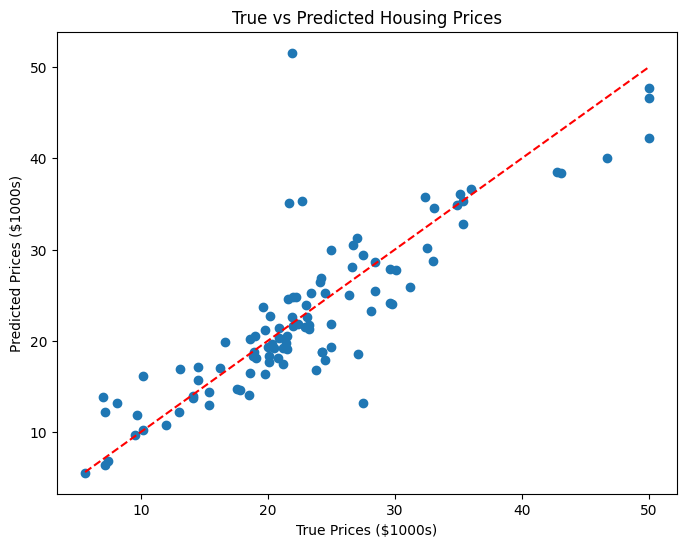

In [5]:
# Evaluate on test data
test_mse, test_mae = model.evaluate(x_test, y_test, verbose=0)
print(f"Test MSE: {test_mse:.3f}, Test MAE: {test_mae:.3f}")

# Predictions
y_pred = model.predict(x_test).flatten()

# Plot True vs Predicted
plt.figure(figsize=(8,6))
plt.scatter(y_test, y_pred)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel('True Prices ($1000s)')
plt.ylabel('Predicted Prices ($1000s)')
plt.title('True vs Predicted Housing Prices')
plt.show()